In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import wrangle
import explore

import warnings
warnings.filterwarnings('ignore')

In [163]:
# set style defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
# change setting to view all columns in jupyter notebook
pd.set_option('display.max_columns', None)

In [4]:
# use a function to pull in the data
fires = wrangle.wrangle_fires()
fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,west,1.008831e+09,small
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,west,1.008831e+09,small
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,west,1.008831e+09,small
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,west,1.008831e+09,small
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,west,1.008831e+09,small


In [5]:
fires.shape

(2166753, 12)

# Univariate Analysis

In [6]:
# check info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fire_year         int64         
 1   discovery_date    datetime64[ns]
 2   general_cause     object        
 3   containment_date  datetime64[ns]
 4   fire_size         float64       
 5   latitude          float64       
 6   longitude         float64       
 7   state             object        
 8   state_size        float64       
 9   region            object        
 10  region_size       float64       
 11  fire_size_cat     object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 214.9+ MB


In [7]:
# set discovery date as index
df = fires.set_index('discovery_date').sort_index()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
discovery_date,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small


In [8]:
# check oldest and newest discovery dates in the dataset
print(df.index.min(), df.index.max())

1992-01-01 00:00:00 2018-12-31 00:00:00


### We have 27 years of data.

In [9]:
# create a year and month column
df['year'] = df.index.year
df['month'] = df.index.month_name()
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January


In [10]:
# check counts for each cause
df.general_cause.value_counts()

Missing data/not specified/undetermined       547438
Debris and open burning                       507219
Natural                                       312807
Arson/incendiarism                            310320
Equipment and vehicle use                     175824
Recreation and ceremony                        92725
Misuse of fire by a minor                      64630
Smoking                                        61689
Railroad operations and maintenance            36437
Power generation/transmission/distribution     28491
Fireworks                                      17205
Other causes                                    9763
Firearms and explosives use                     2205
Name: general_cause, dtype: int64

### It looks like a good chunk of our data has no specified cause.

<AxesSubplot:>

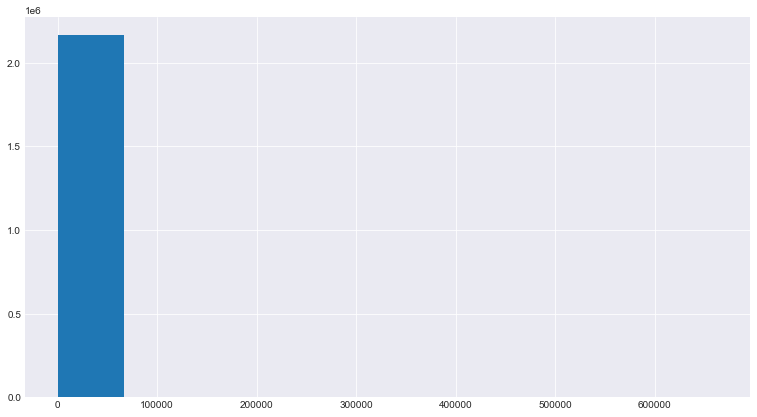

In [11]:
# plot fire size
df.fire_size.hist()

In [116]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

In [117]:
df.fire_size.mean()

75.99039753419058

### The data contains some outliers when it comes to fire size

In [13]:
df.fire_size_cat.value_counts()

small    2162298
large       4455
Name: fire_size_cat, dtype: int64

In [14]:
print(df.fire_size.max())
print(df.fire_size.min())

662700.0
1e-05


In [15]:
# # create a scatter plot of fire by latitude and longitude
# sns.scatterplot(x='longitude', y='latitude', hue='state', data=df)

In [16]:
# check value counts by state
df.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

### States in the NorthEastern part of the United States have the least wildfires. Not surprisingly, California has the most. Other states with the most wildfires seem to be primarily in the South.

# How has the number and size of wildfires changed over time?

### What is the number of fires per year for all years we have in the data?

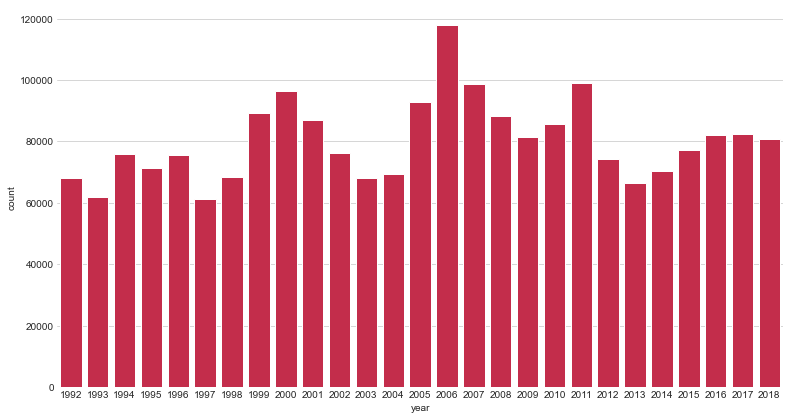

In [162]:
# plot counts by year

sns.countplot(data=df, x='year', color='crimson');

### 2006, 2007, and 2011 had the most wildfires. There does almost appear to be a cycle of 5-6 years for the amount of wildfires.

### Are wildfires more prevalent at certain times of year?

<AxesSubplot:xlabel='month', ylabel='count'>

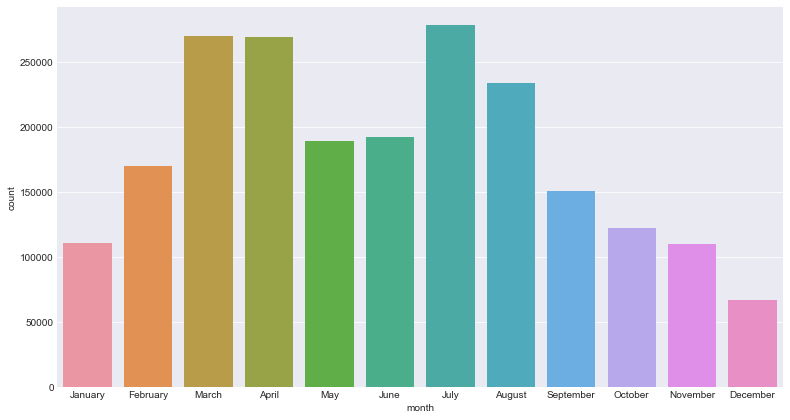

In [18]:
# plot counts by month
sns.countplot(data=df, x='month')

### Not surprisingly, July & August tend to have more fires which is likely due to heat, camping, and dry weather. It is surprising to see that March & April have a higher number of fires as well.

### Get visualization of value counts by state

<AxesSubplot:xlabel='count', ylabel='state'>

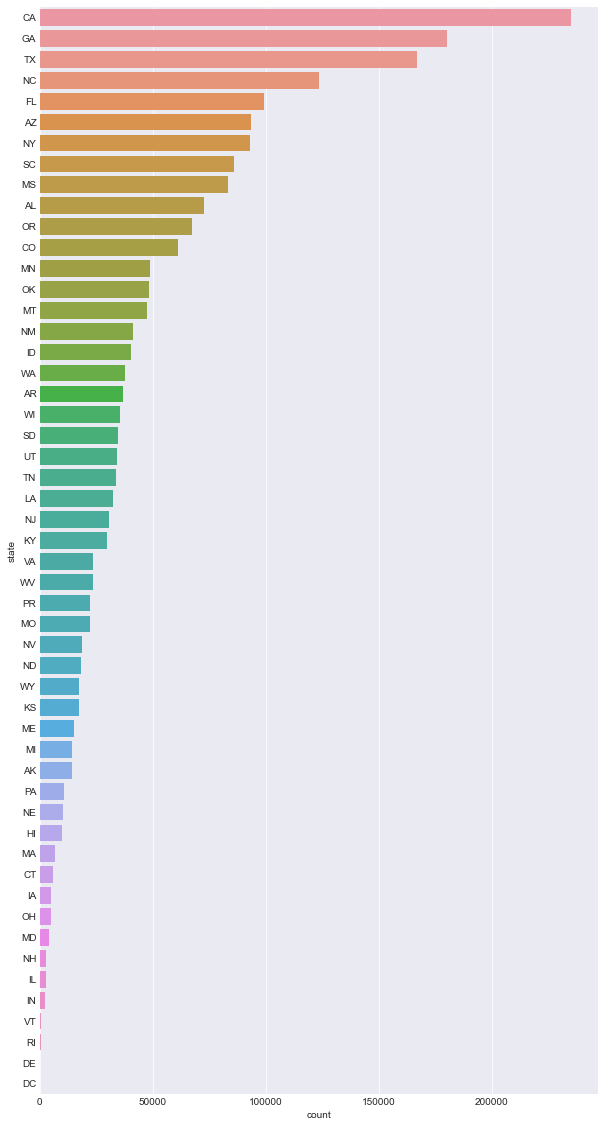

In [19]:
# plot counts by state
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='state', order=df.state.value_counts().index)

In [20]:
# find out what percentage of fires occur in each state
df.state.value_counts(normalize=True)

CA    0.108563
GA    0.083154
TX    0.077102
NC    0.057133
FL    0.045855
AZ    0.043114
NY    0.043000
SC    0.039700
MS    0.038355
AL    0.033452
OR    0.030994
CO    0.028257
MN    0.022466
OK    0.022218
MT    0.021812
NM    0.019011
ID    0.018532
WA    0.017440
AR    0.016928
WI    0.016299
SD    0.016052
UT    0.015843
TN    0.015512
LA    0.014881
NJ    0.014101
KY    0.013666
VA    0.010960
WV    0.010952
PR    0.010227
MO    0.010153
NV    0.008711
ND    0.008450
WY    0.008093
KS    0.008064
ME    0.006888
MI    0.006538
AK    0.006519
PA    0.004986
NE    0.004779
HI    0.004592
MA    0.003128
CT    0.002772
IA    0.002351
OH    0.002182
MD    0.001822
NH    0.001355
IL    0.001299
IN    0.001018
VT    0.000310
RI    0.000291
DE    0.000086
DC    0.000037
Name: state, dtype: float64

### What does the number of fires and size of fires look like by month?

In [21]:
# resample by month and get count of wildfires by month
num_fires_by_month = df.resample('M').fire_year.count()
num_fires_by_month.head()

discovery_date
1992-01-31    3603
1992-02-29    7114
1992-03-31    8706
1992-04-30    7807
1992-05-31    8572
Freq: M, Name: fire_year, dtype: int64

In [22]:
# check number of rows
num_fires_by_month.shape

(324,)

In [23]:
# check which month and year combination had the most fires
num_fires_by_month.idxmax()

Timestamp('2006-03-31 00:00:00', freq='M')

In [24]:
# check how many fires happened that month
num_fires_by_month.max()

19001

### March 2006 had the highest number of fires within the dataset with slightly over 19K fires occurring in that month.

<AxesSubplot:xlabel='discovery_date'>

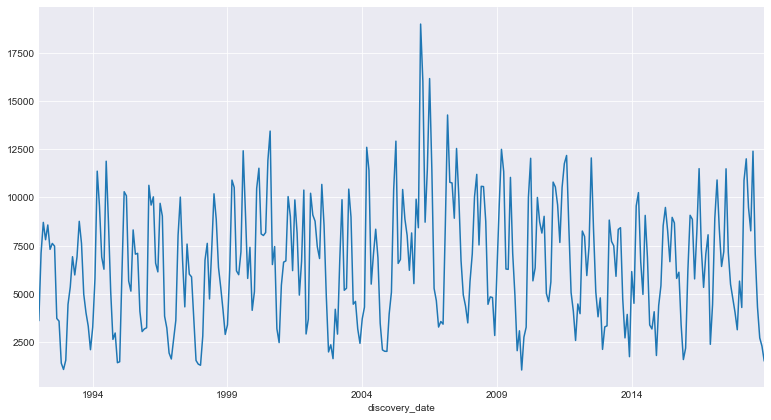

In [25]:
# plot monthly number of fires over the years
num_fires_by_month.plot()

<AxesSubplot:xlabel='discovery_date'>

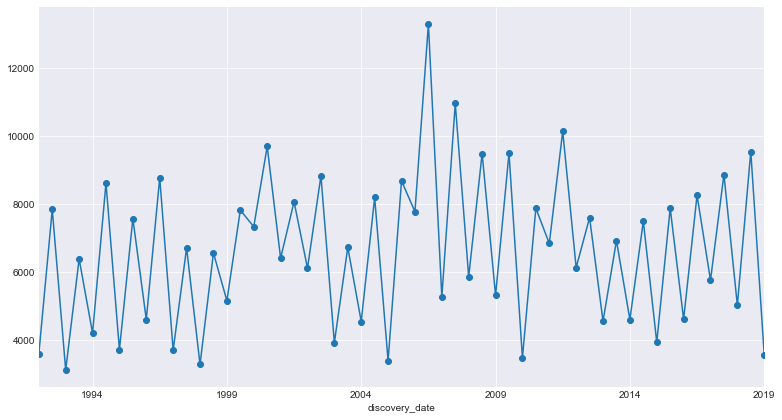

In [26]:
# plot number of fires over the years resampled by 6 months
num_fires_by_month.resample('6M').mean().plot(marker='o')

<AxesSubplot:xlabel='discovery_date'>

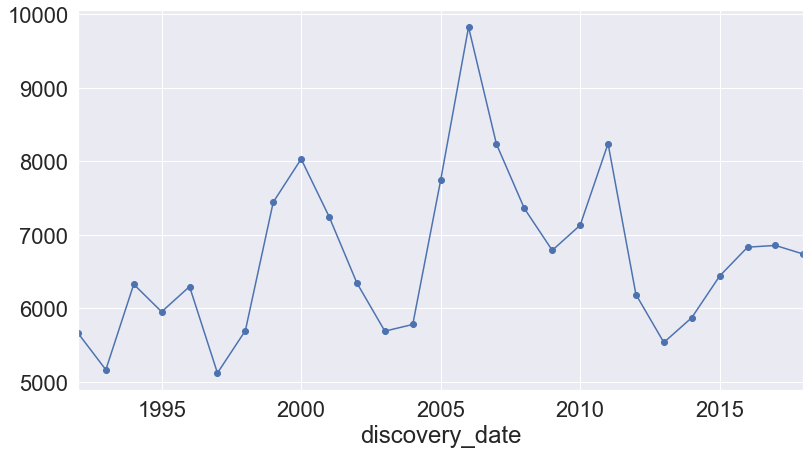

In [270]:
# plot number of fires over the years resampled by a year
num_fires_by_month.resample('Y').mean().plot(marker='o')

In [28]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January


In [29]:
# resample by month and get summed size of wildfires by month
size_fires_by_month = df.resample('M').fire_size.sum()
size_fires_by_month.head()

discovery_date
1992-01-31     32394.200
1992-02-29     84918.650
1992-03-31    129638.123
1992-04-30     94382.285
1992-05-31    124084.533
Freq: M, Name: fire_size, dtype: float64

In [30]:
# check which month and year combination had the largest summed size of wildfires
size_fires_by_month.idxmax()

Timestamp('2015-06-30 00:00:00', freq='M')

In [31]:
# check total sum of fire sizes that month
size_fires_by_month.max()

5248481.509999639

### June 2015 had the largest area burned by wildfires within the dataset with slightly over 5.2M acres burned that month. 

<AxesSubplot:xlabel='year'>

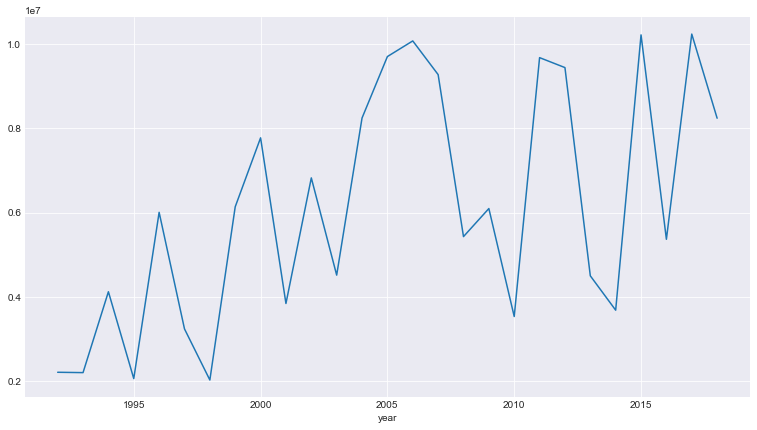

In [32]:
# plot monthly summed size of fires over the years
df.groupby('year').fire_size.sum().plot()

<AxesSubplot:xlabel='discovery_date'>

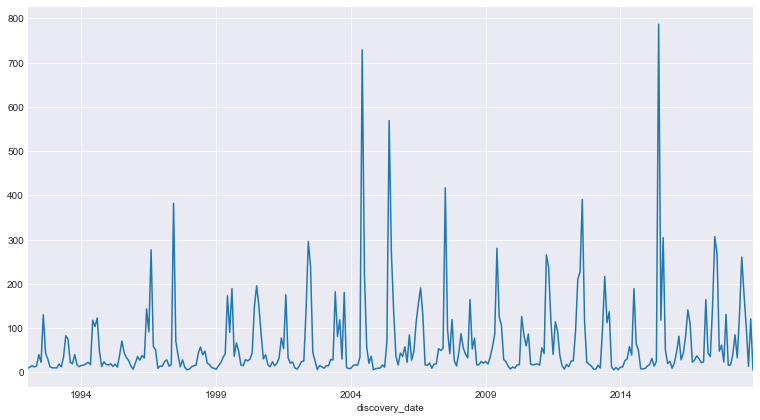

In [33]:
# plot monthly average size of fires over the years
df.resample('M').fire_size.mean().plot()

<AxesSubplot:xlabel='discovery_date'>

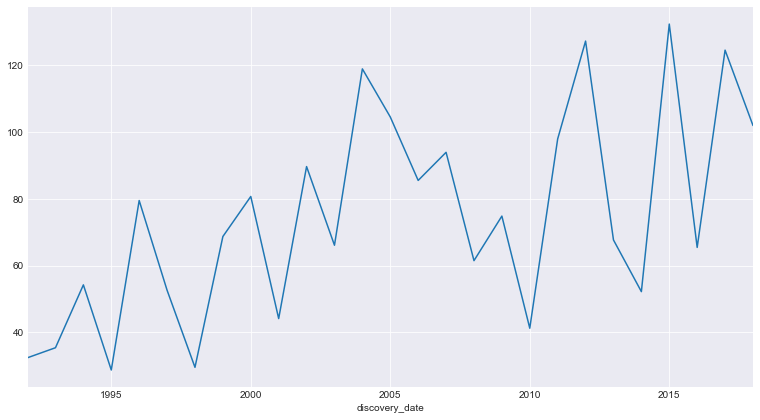

In [34]:
# plot yearly average size of fires over the years
df.resample('Y').fire_size.mean().plot()

In [260]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month,decade
discovery_date,,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999


### Plot trend line of size of fires over the years vs number of fires over the years.

<AxesSubplot:xlabel='discovery_date', ylabel='fire_size'>

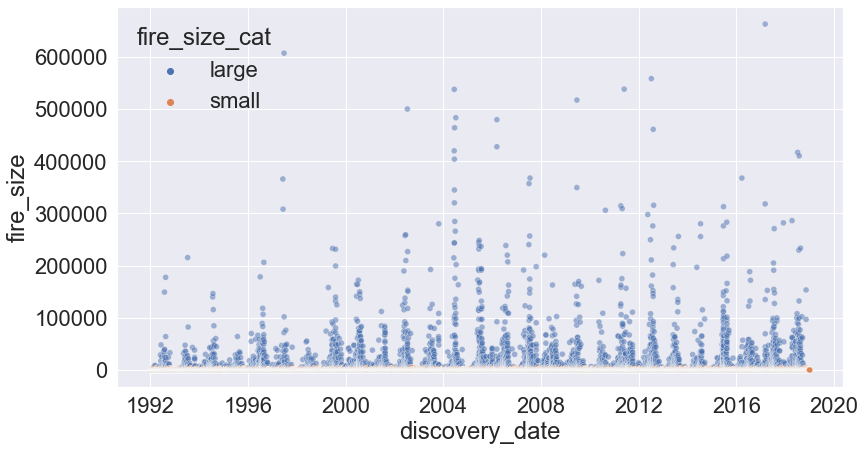

In [267]:
sns.scatterplot(data=df, x=df.index, y='fire_size', hue='fire_size_cat', alpha=.5, hue_order=['large', 'small'])

In [179]:
# create dataframe of total sum of fire_size by year
yearly_mean_fire_size = df.groupby('year').fire_size.sum().reset_index()

In [180]:
yearly_mean_fire_size.fire_size = round((yearly_mean_fire_size.fire_size / 1_000_000), 2)
yearly_mean_fire_size

,year,fire_size
0,1992,2.20
1,1993,2.19
2,1994,4.12
3,1995,2.05
4,1996,6.00
5,1997,3.23
6,1998,2.02
7,1999,6.14
8,2000,7.78
9,2001,3.84


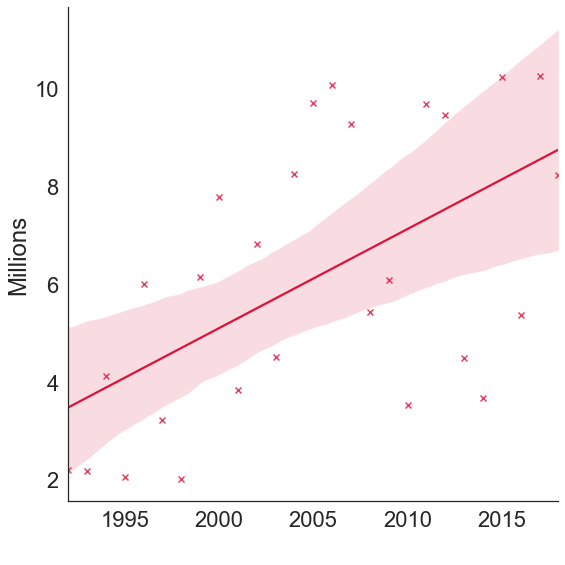

In [229]:
# plot trend of fire size by year
sns.lmplot(x='year', y='fire_size', data=yearly_mean_fire_size, height=8, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
sns.set(font_scale = 2)
plt.ylabel('Millions')
plt.xlabel(' ');

In [2]:
# create dataframe of total sum of fire_size by year
yearly_fire_count = df.groupby('year').fire_size.count().reset_index()

NameError: name 'df' is not defined

In [214]:
yearly_fire_count.fire_size = round(yearly_fire_count.fire_size / 1_000)
yearly_fire_count

,year,fire_size
0,1992,68.0
1,1993,62.0
2,1994,76.0
3,1995,71.0
4,1996,76.0
5,1997,61.0
6,1998,68.0
7,1999,89.0
8,2000,96.0
9,2001,87.0


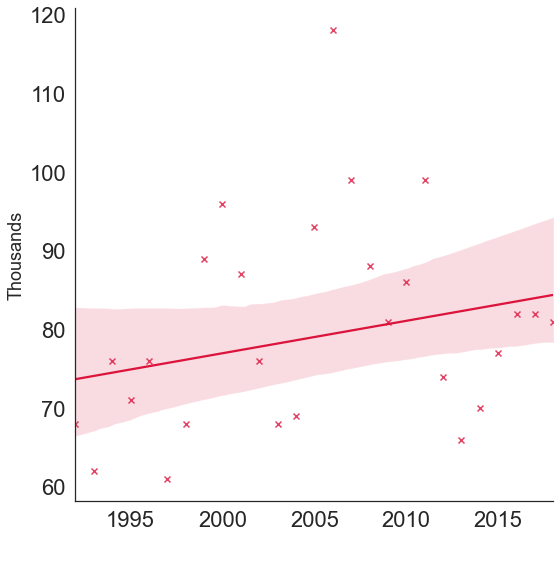

In [228]:
# plot trend of fire count by year
sns.set_style('white')

sns.lmplot(x='year', y='fire_size', data=yearly_fire_count, height=8, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
plt.ylabel('Thousands', fontsize=18)
plt.xlabel(' ');

In [53]:
num_sm_fires = df[df.fire_size < 5000].shape[0]
num_lg_fires = df[df.fire_size >= 5000].shape[0]
acres_sm_fires = df[df.fire_size < 5000].fire_size.sum()
acres_lg_fires = df[df.fire_size >= 5000].fire_size.sum()

In [54]:
num_lg_fires

4455

In [103]:
print(num_lg_fires / df.shape[0])
print(1 - (num_lg_fires / df.shape[0]))

0.0020560719195958192
0.9979439280804042


In [56]:
acres_lg_fires / df.fire_size.sum()

0.7427143601866459

### While accounting for only .02% of the number of wildfires, large fires (those greater than 5,000 acres) account for about 74% of all acreage burned

In [57]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January


In [58]:
df.groupby('year').count()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,month
year,,,,,,,,,,,,
1992,67961,67961,42369,67961,67961,67961,67961,67961,67961,67961,67961,67961
1993,61972,61972,39589,61972,61972,61972,61972,61972,61972,61972,61972,61972
1994,75935,75935,46718,75935,75935,75935,75935,75935,75935,75935,75935,75935
1995,71440,71440,43844,71440,71440,71440,71440,71440,71440,71440,71440,71440
1996,75561,75561,48593,75561,75561,75561,75561,75561,75561,75561,75561,75561
1997,61442,61442,28070,61442,61442,61442,61442,61442,61442,61442,61442,61442
1998,68356,68356,26694,68356,68356,68356,68356,68356,68356,68356,68356,68356
1999,89350,89350,33511,89350,89350,89350,89350,89350,89350,89350,89350,89350
2000,96397,96397,46970,96397,96397,96397,96397,96397,96397,96397,96397,96397


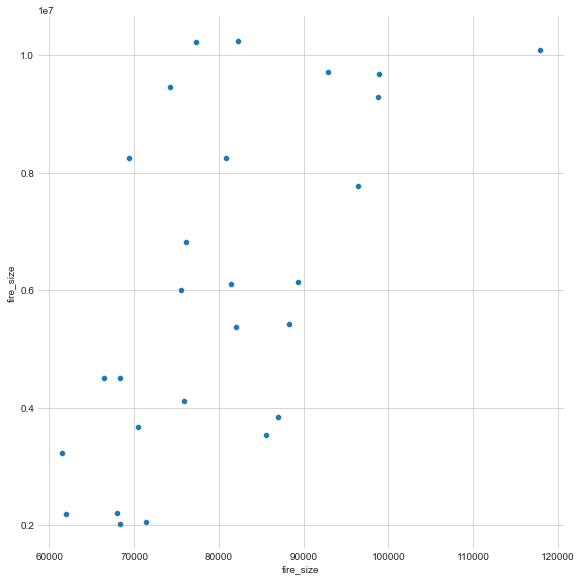

In [59]:
# plot trend of fire count by year
sns.relplot(x=df.groupby('year').fire_size.count(), y=df.groupby('year').fire_size.sum(), data=df, height=8, markers='x')

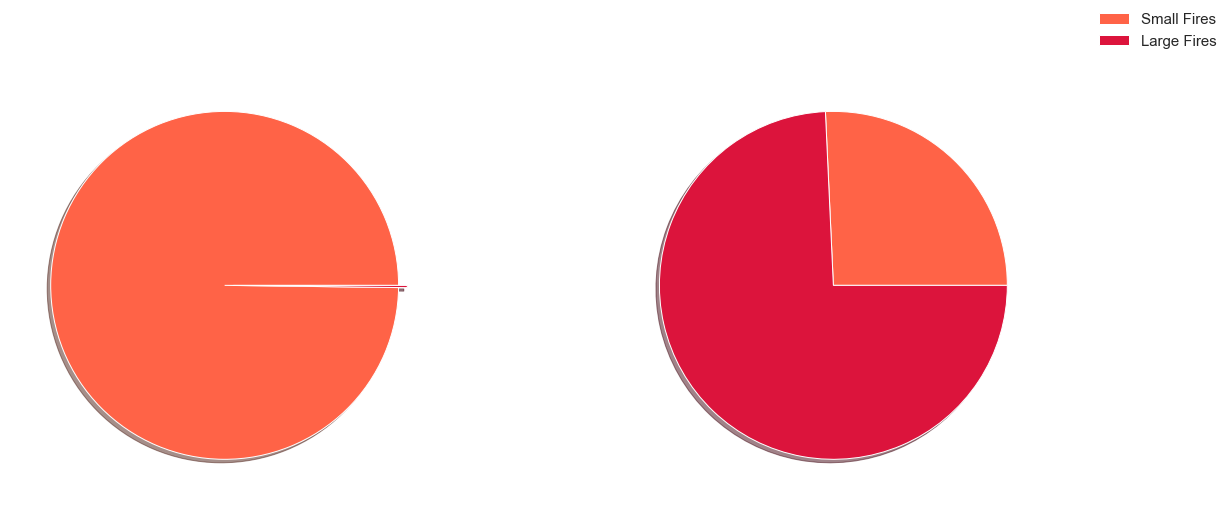

In [169]:
labels=['Small Fires', 'Large Fires']
colors = ['tomato', 'crimson']

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.pie(x = [num_sm_fires, num_lg_fires], colors = colors, textprops = {'size':14}, explode=(0,.05), shadow=True)
# plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.pie(x = [acres_sm_fires, acres_lg_fires], colors = colors, textprops = {'size':14}, shadow=True)
# plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.figlegend(labels, fontsize =15)
plt.show()

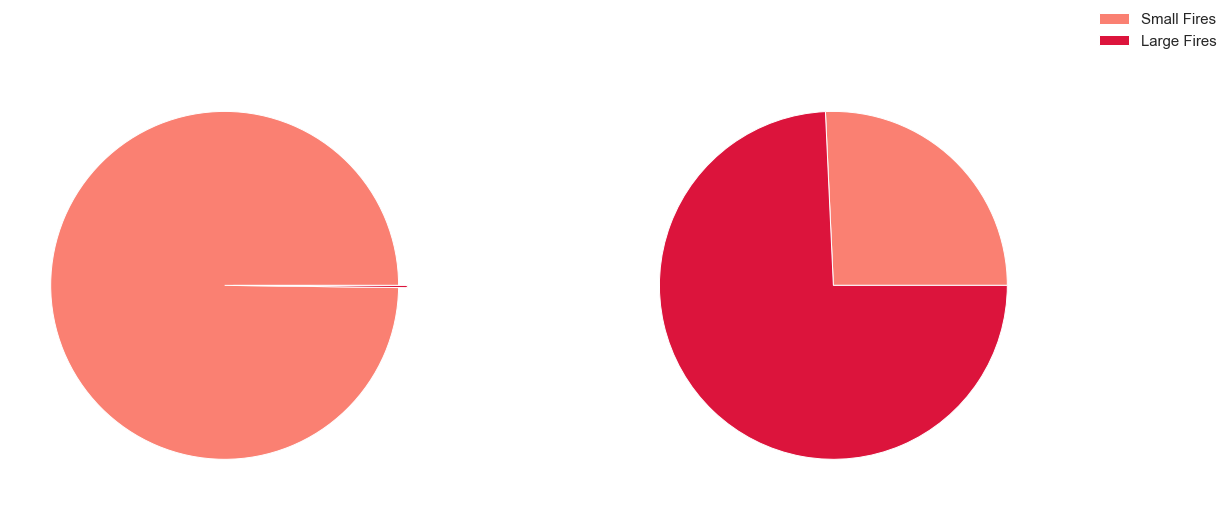

In [291]:
labels=['Small Fires', 'Large Fires']

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.pie(x = [num_sm_fires, num_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14}, explode=(0,.05))
plt.figlegend(labels, fontsize =15)
# plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.pie(x = [acres_sm_fires, acres_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14})
# plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.show()

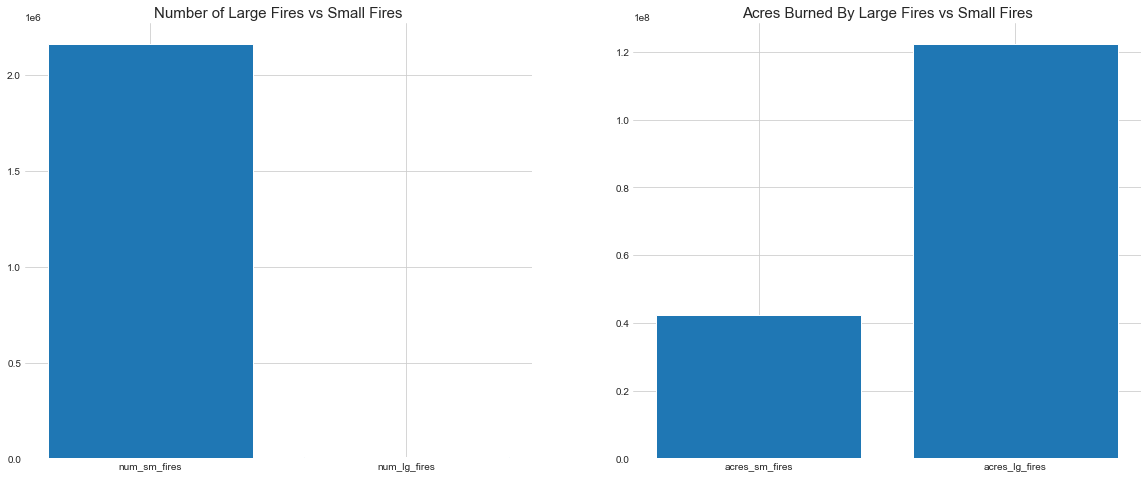

In [61]:
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.bar(x = ['num_sm_fires', 'num_lg_fires'], height=[num_sm_fires, num_lg_fires])
plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.bar(x = ['acres_sm_fires', 'acres_lg_fires'], height=[acres_sm_fires, acres_lg_fires])
plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.show()

### When resampling by year, there is not a clear trend in the *number* of wildfires however, we do see that the average *size* of wildfires is on an upward trend

In [62]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January


In [63]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

In [64]:
df[df.fire_size > 100]

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Missing data/not specified/undetermined,NaT,150.0,41.167488,-105.813500,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Natural,NaT,400.0,42.946171,-105.897697,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-03,1992,Equipment and vehicle use,NaT,175.0,28.500000,-81.700000,FL,38392000.0,southeast,3.670760e+08,small,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,240.0,29.790000,-84.950000,FL,38392000.0,southeast,3.670760e+08,small,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,300.0,41.239269,-104.820198,WY,62604000.0,west,1.008831e+09,small,1992,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-20,110.0,35.651100,-98.389700,OK,44738000.0,southwest,3.665820e+08,small,2018,December
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-22,420.0,36.670800,-96.732200,OK,44738000.0,southwest,3.665820e+08,small,2018,December
2018-12-23,2018,Missing data/not specified/undetermined,2018-12-23,559.0,29.562045,-94.466741,TX,171057000.0,southwest,3.665820e+08,small,2018,December


In [65]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month
discovery_date,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January


In [66]:
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()
top_five_wildfire_states

['CA', 'GA', 'TX', 'NC', 'FL']

In [67]:
num_fires_by_year = df[df.state.isin(top_five_wildfire_states)]\
.groupby(['year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'fire_year':'num_fires'})
num_fires_by_year

,year,state,num_fires
0,1992,CA,10831
1,1992,FL,4222
2,1992,GA,6458
3,1992,NC,5696
4,1992,TX,1168
...,...,...,...
130,2018,CA,9488
131,2018,FL,2072
132,2018,GA,2574
133,2018,NC,3085


<AxesSubplot:xlabel='year', ylabel='num_fires'>

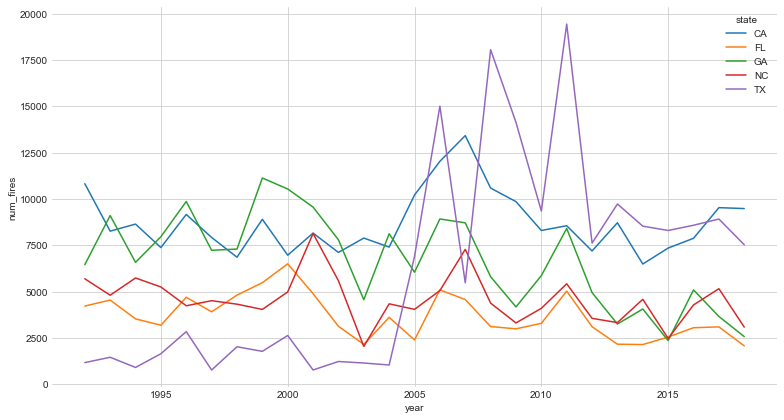

In [68]:

sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state')

In [69]:

top_causes_of_wildfires = df.general_cause.value_counts().head()
top_causes_of_wildfires

Missing data/not specified/undetermined    547438
Debris and open burning                    507219
Natural                                    312807
Arson/incendiarism                         310320
Equipment and vehicle use                  175824
Name: general_cause, dtype: int64

In [70]:
top_causes_of_wildfires[1:].index.to_list()

['Debris and open burning',
 'Natural',
 'Arson/incendiarism',
 'Equipment and vehicle use']

In [71]:
# create a new dataframe that groups by year and gets a count by year of the top causes for wildfires
num_causes_by_year = df[df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'fire_year':'num_occurrences'})
num_causes_by_year

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036
...,...,...,...
103,2017,Natural,8752
104,2018,Arson/incendiarism,6019
105,2018,Debris and open burning,18674
106,2018,Equipment and vehicle use,7385


<AxesSubplot:xlabel='year', ylabel='num_occurrences'>

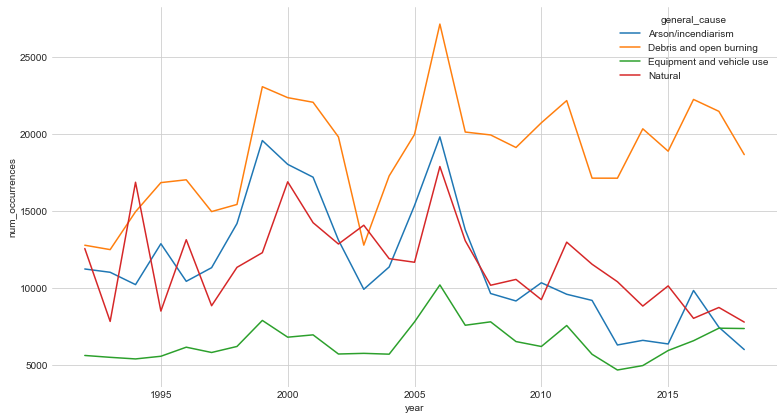

In [72]:
# plot trends over the years by the top four causes of wildfires, excluding observations where cause was not specified
sns.lineplot(data=num_causes_by_year, x='year', y='num_occurrences', hue='general_cause')

In [73]:
num_causes_by_year.head()

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036


In [74]:
num_causes_by_year.to_csv('num_causes_by_year')

In [75]:
num_causes_by_year.shape

(108, 3)

Text(0.5, 1.0, 'Top Causes Of Wildfires Across The U.S.')

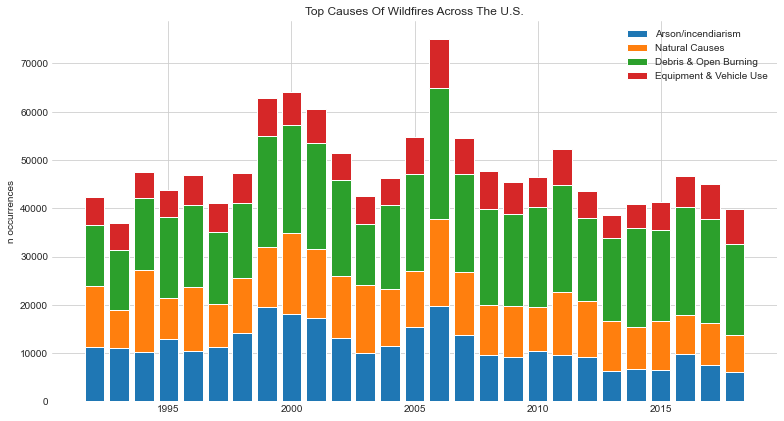

In [76]:
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

natural = natural.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

fig, ax = plt.subplots()
labels = arson.index

ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism")
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=arson.num_occurrences)
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning", bottom=natural.num_occurrences + arson.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + natural.num_occurrences + arson.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.")

<AxesSubplot:xlabel='count', ylabel='year'>

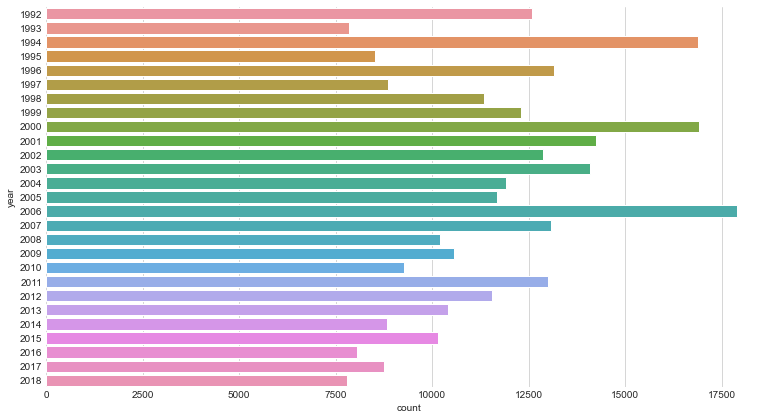

In [77]:
# plot wildfires caused by natural causes by year
sns.countplot(data=df[df.general_cause == 'Natural'], y='year')

### In recent years, we have seen a decrease in number of wildfires that were caused by natural causes

<AxesSubplot:xlabel='count', ylabel='year'>

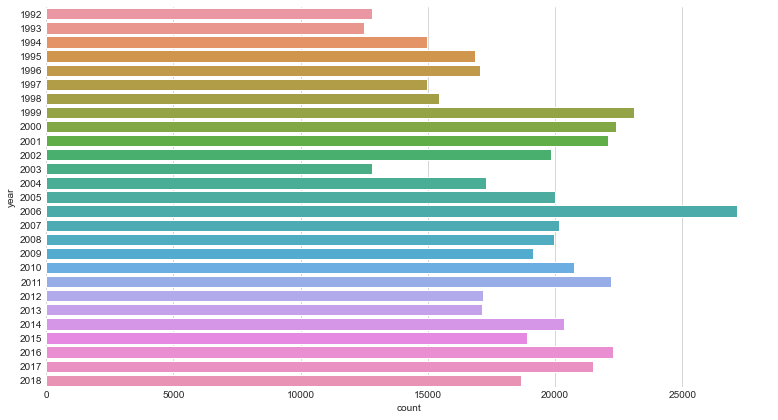

In [78]:
# plot wildfires caused by Debris and open burning by year
sns.countplot(data=df[df.general_cause == 'Debris and open burning'], y='year')

### There appears to be a slight upward trend in debris and open burning as a cause of wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

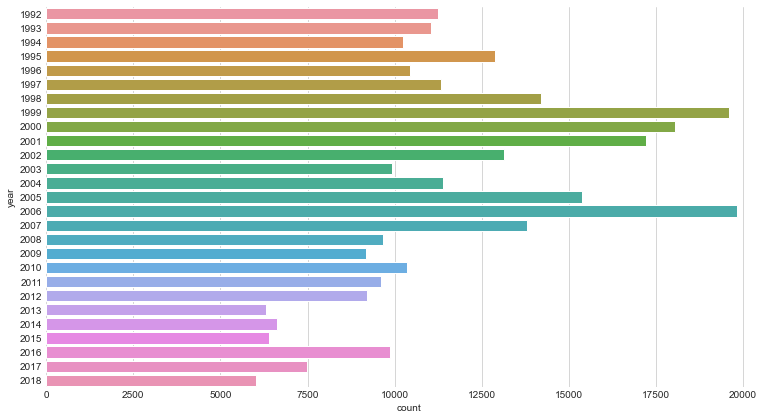

In [79]:
# plot wildfires caused by Arson/incendiarism by year
sns.countplot(data=df[df.general_cause == 'Arson/incendiarism'], y='year')

### There are some spikes but otherwise a downward trend in arson/incendiarism as a cause for wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

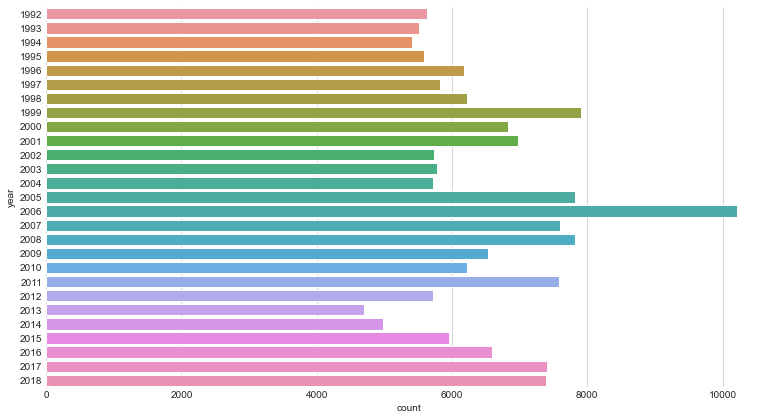

In [80]:
# plot wildfires caused by Equipment and vehicle use by year
sns.countplot(data=df[df.general_cause == 'Equipment and vehicle use'], y='year')

### There are no obvious trends or anything that really stands out in this plot for equipment and vehicle use as a cause for wildfires. 

### There's no one cause for the higher number of fires in 2006. All causes have higher numbers for this year.

In [81]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### I want to get a better understanding of range of wildfire sizes

In [82]:
print(f'The 10th percentile is: {df.fire_size.quantile(.1)}')
print(f'The 20th percentile is: {df.fire_size.quantile(.2)}')
print(f'The 25th percentile is: {df.fire_size.quantile(.25)}')
print(f'The 30th percentile is: {df.fire_size.quantile(.3)}')
print(f'The 40th percentile is: {df.fire_size.quantile(.4)}')
print(f'The 50th percentile is: {df.fire_size.quantile(.5)}')
print(f'The 60th percentile is: {df.fire_size.quantile(.6)}')
print(f'The 70th percentile is: {df.fire_size.quantile(.7)}')
print(f'The 75th percentile is: {df.fire_size.quantile(.75)}')
print(f'The 80th percentile is: {df.fire_size.quantile(.8)}')
print(f'The 90th percentile is: {df.fire_size.quantile(.9)}')
print(f'The 100th percentile is: {df.fire_size.quantile(1)}')

The 10th percentile is: 0.1
The 20th percentile is: 0.1
The 25th percentile is: 0.1
The 30th percentile is: 0.16
The 40th percentile is: 0.3
The 50th percentile is: 0.97
The 60th percentile is: 1.0
The 70th percentile is: 2.0
The 75th percentile is: 3.0
The 80th percentile is: 5.0
The 90th percentile is: 15.5
The 100th percentile is: 662700.0


<AxesSubplot:>

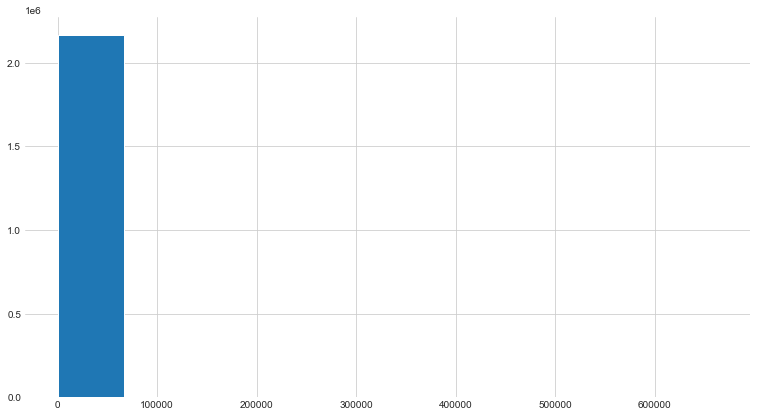

In [83]:
df.fire_size.hist()

In [84]:
df[df.fire_size > 100000].shape

(210, 13)

<AxesSubplot:>

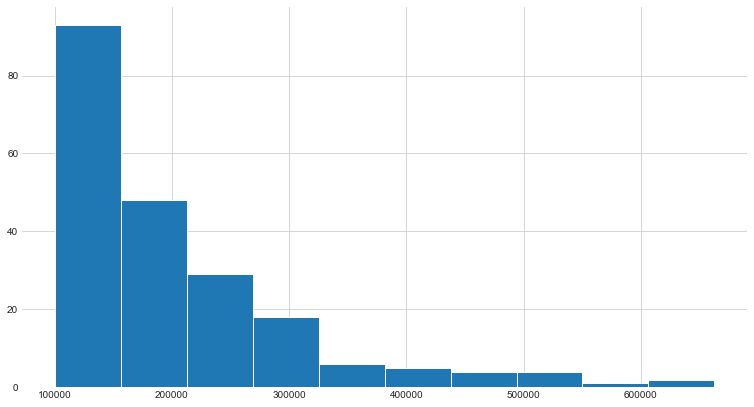

In [85]:
# check 
df[df.fire_size > 100000].fire_size.hist()

<AxesSubplot:xlabel='year', ylabel='count'>

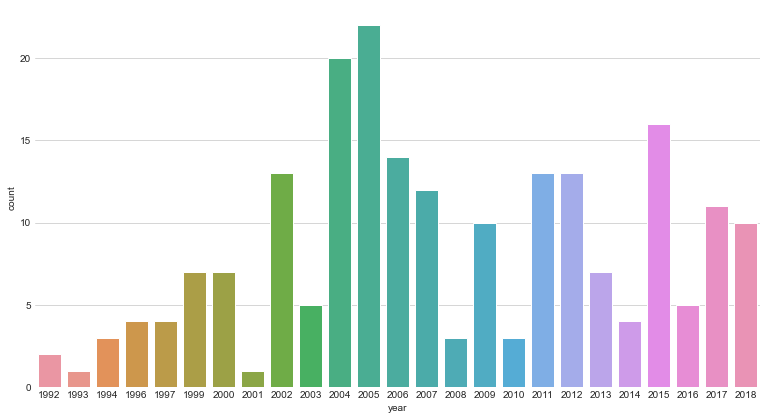

In [86]:
# plot counts of large fires by year
sns.countplot(data=df[df.fire_size > 100000], x='year')

### I want to graph the average size of wildfires per decade to see if I can clearly represent the trend to our audience.

In [87]:
# create another column categorizing decade
conditions = [df.year < 2000, df.year <2010, df.year <2020]
choices = ['1992 - 1999', '2000 - 2009', '2010 - ']
df['decade'] = np.select(conditions, choices)
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month,decade
discovery_date,,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999


<AxesSubplot:xlabel='decade', ylabel='fire_size'>

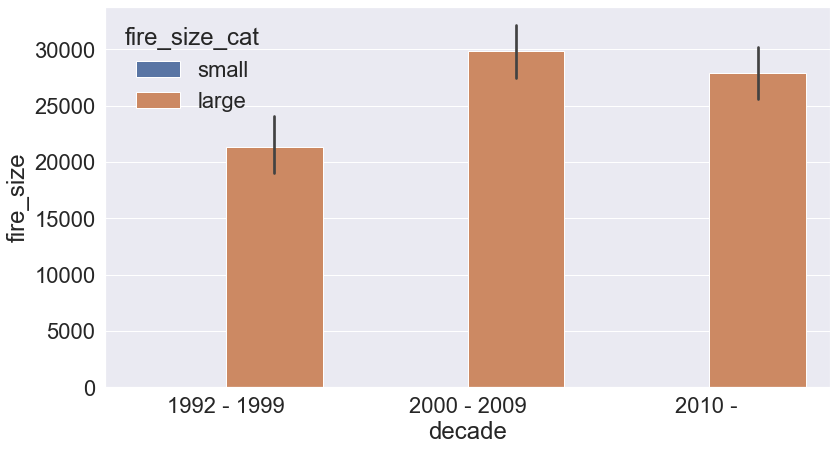

In [239]:
# plot average fire size by decade
sns.barplot(data=df, x='decade', y='fire_size', hue='fire_size_cat')

### I am also going to try to graph average fire size per quinquennial between 1995-2015 to see if that also represents this trend

In [89]:
# create another dataframe where I can chunk the data into 5-year periods
df2 = df[(df.year >=1996) & (df.year <=2015)]
df2.year.value_counts().sort_index()

1996     75561
1997     61442
1998     68356
1999     89350
2000     96397
2001     87001
2002     76128
2003     68279
2004     69371
2005     92920
2006    117944
2007     98832
2008     88322
2009     81477
2010     85578
2011     98904
2012     74258
2013     66434
2014     70480
2015     77275
Name: year, dtype: int64

In [90]:
# create another column categorizing quinquennial
conditions = [df2.year <= 2000, df2.year <= 2005, df2.year <= 2010, df2.year <= 2015]
choices = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
df2['quinquennial'] = np.select(conditions, choices)
df2.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month,decade,quinquennial
discovery_date,,,,,,,,,,,,,,,
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.10,34.011944,-117.391111,CA,101676000.0,west,1.008831e+09,small,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Debris and open burning,1996-01-01,6.77,31.892300,-81.873900,GA,37745000.0,southeast,3.670760e+08,small,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.10,33.778889,-117.216111,CA,101676000.0,west,1.008831e+09,small,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Missing data/not specified/undetermined,NaT,0.30,33.521111,-116.901944,CA,101676000.0,west,1.008831e+09,small,1996,January,1992 - 1999,1996 - 2000
1996-01-01,1996,Equipment and vehicle use,NaT,0.10,34.026944,-117.426111,CA,101676000.0,west,1.008831e+09,small,1996,January,1992 - 1999,1996 - 2000


<AxesSubplot:xlabel='quinquennial', ylabel='fire_size'>

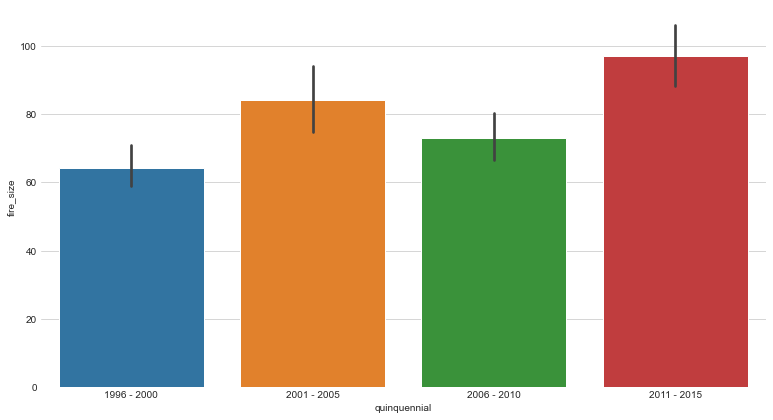

In [91]:
# plot average fire size by quinquennial
sns.barplot(data=df2, x='quinquennial', y='fire_size')

<AxesSubplot:xlabel='quinquennial', ylabel='count'>

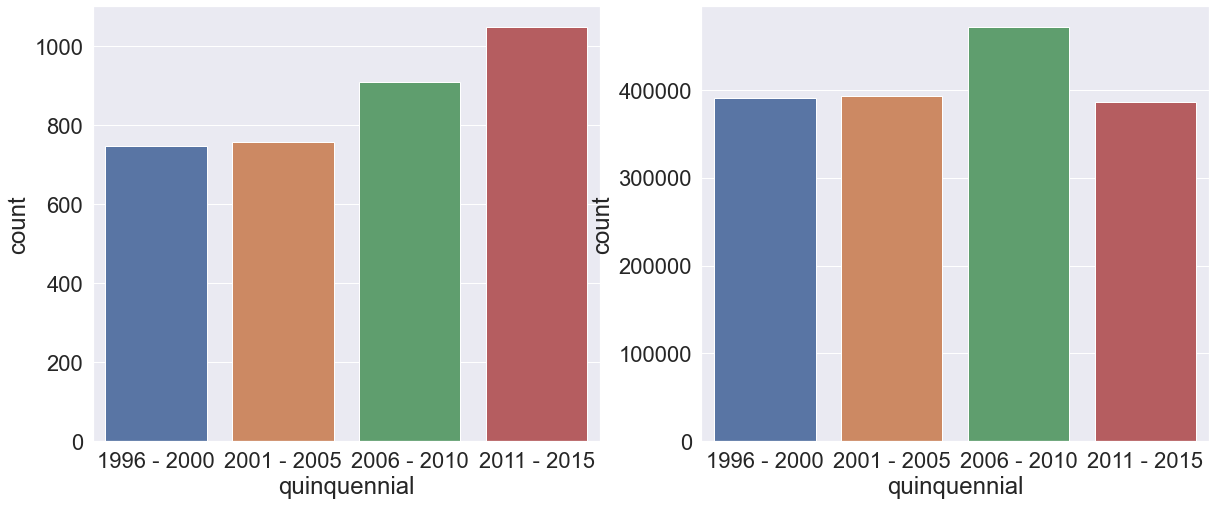

In [277]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df2[df2.fire_size_cat == 'large'], x='quinquennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

plt.subplot(122)
sns.countplot(data=df2[df2.fire_size_cat == 'small'], x='quinquennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

In [282]:
# create another column categorizing quinquennial
conditions = [df.year <= 1994, df.year <= 1997, df.year <= 2000, df.year <= 2003, df.year <= 2006, df.year <= 2009, df.year <= 2012, df.year <= 2015, df.year <= 2018]
choices = ['94', '97', '00', '03', '06', '09', '12', '15', '18']
df['triennial'] = np.select(conditions, choices)
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month,decade,three_yr,triennial
discovery_date,,,,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January,1992 - 1999,67961,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94


In [289]:
# create another column categorizing quinquennial
conditions = [df.year <= 2000, df.year <= 2009, df.year <= 2018]
choices = ['1992 - ', '97', '00']
df['nine_years'] = np.select(conditions, choices)
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,year,month,decade,three_yr,triennial,nine_years
discovery_date,,,,,,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,1992,January,1992 - 1999,67961,94,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94,94
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,62604000.0,west,1.008831e+09,small,1992,January,1992 - 1999,67961,94,94


<AxesSubplot:xlabel='nine_years', ylabel='count'>

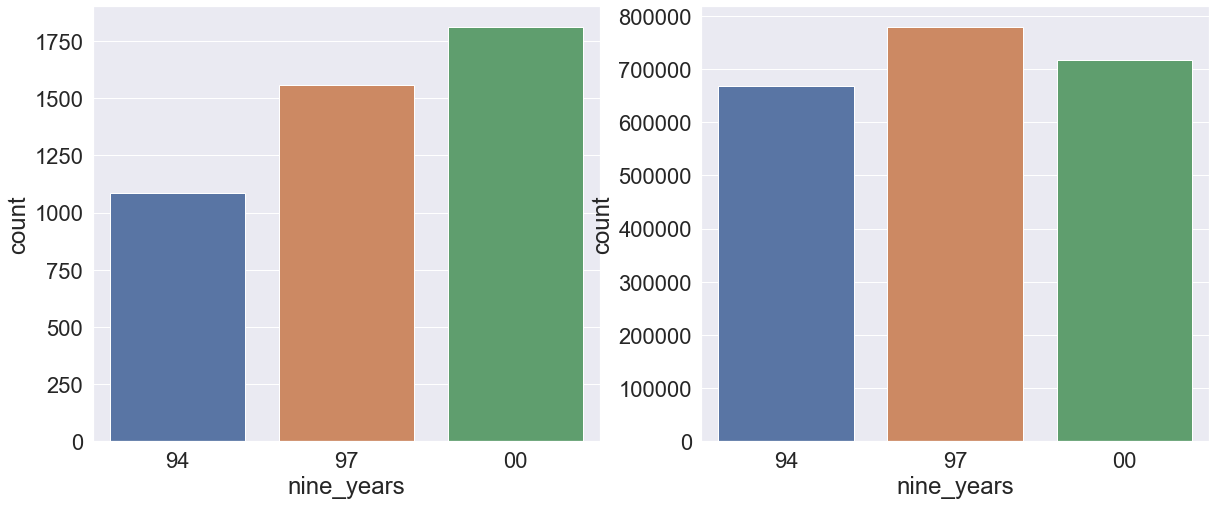

In [290]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df[df.fire_size_cat == 'small'], x='nine_years')
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

plt.subplot(122)
sns.countplot(data=df[df.fire_size_cat == 'large'], x='nine_years')
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

<AxesSubplot:xlabel='triennial', ylabel='count'>

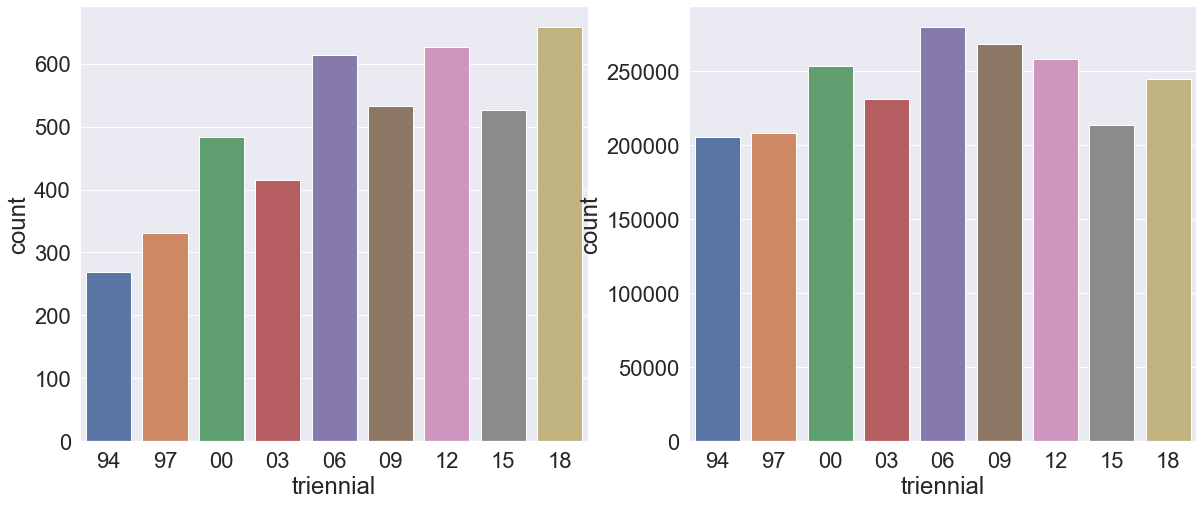

In [288]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df[df.fire_size_cat == 'large'], x='triennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

plt.subplot(122)
sns.countplot(data=df[df.fire_size_cat == 'small'], x='triennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

In [92]:
df2.quinquennial.value_counts()

2006 - 2010    472153
2001 - 2005    393699
1996 - 2000    391106
2011 - 2015    387351
Name: quinquennial, dtype: int64

In [93]:
# US fire size category total fire size, over time
# group by fire_size_cat, sum fire_size, show year
sizes = df2.groupby(['fire_size_cat', 'quinquennial']).fire_size.sum()
sizes

fire_size_cat  quinquennial
large          1996 - 2000     1.762357e+07
               2001 - 2005     2.614225e+07
               2006 - 2010     2.456771e+07
               2011 - 2015     2.969284e+07
small          1996 - 2000     7.542910e+06
               2001 - 2005     6.988914e+06
               2006 - 2010     9.845666e+06
               2011 - 2015     7.838617e+06
Name: fire_size, dtype: float64

In [104]:
sizes = df2.groupby(['quinquennial', 'fire_size_cat']).fire_size.sum().to_frame().reset_index()
sizes

,quinquennial,fire_size_cat,fire_size
0,1996 - 2000,large,1.762357e+07
1,1996 - 2000,small,7.542910e+06
2,2001 - 2005,large,2.614225e+07
3,2001 - 2005,small,6.988914e+06
4,2006 - 2010,large,2.456771e+07
5,2006 - 2010,small,9.845666e+06
6,2011 - 2015,large,2.969284e+07
7,2011 - 2015,small,7.838617e+06


In [106]:
size = sizes.pivot(index='quinquennial', columns='fire_size_cat').reset_index()
size

quinquennial     fire_size              
fire_size_cat                      large         small
0              1996 - 2000  1.762357e+07  7.542910e+06
1              2001 - 2005  2.614225e+07  6.988914e+06
2              2006 - 2010  2.456771e+07  9.845666e+06
3              2011 - 2015  2.969284e+07  7.838617e+06

In [95]:
# size = sizes.reset_index().pivot(index='quinquennial', columns='fire_size_cat').reset_index()
# size

quinquennial     fire_size              
fire_size_cat                      large         small
0              1996 - 2000  1.762357e+07  7.542910e+06
1              2001 - 2005  2.614225e+07  6.988914e+06
2              2006 - 2010  2.456771e+07  9.845666e+06
3              2011 - 2015  2.969284e+07  7.838617e+06

In [107]:
size.columns

MultiIndex([('quinquennial',      ''),
            (   'fire_size', 'large'),
            (   'fire_size', 'small')],
           names=[None, 'fire_size_cat'])

In [108]:
size.columns = ['quinquennial', 'large', 'small']

In [109]:
size.head()

,quinquennial,large,small
0,1996 - 2000,1.762357e+07,7.542910e+06
1,2001 - 2005,2.614225e+07,6.988914e+06
2,2006 - 2010,2.456771e+07,9.845666e+06
3,2011 - 2015,2.969284e+07,7.838617e+06


In [110]:
size['lg_normalized'] = size.large / (size.large + size.small)
size['sm_normalized'] = 1 - (size.large / (size.large + size.small))
size

,quinquennial,large,small,lg_normalized,sm_normalized
0,1996 - 2000,1.762357e+07,7.542910e+06,0.700280,0.299720
1,2001 - 2005,2.614225e+07,6.988914e+06,0.789053,0.210947
2,2006 - 2010,2.456771e+07,9.845666e+06,0.713900,0.286100
3,2011 - 2015,2.969284e+07,7.838617e+06,0.791145,0.208855


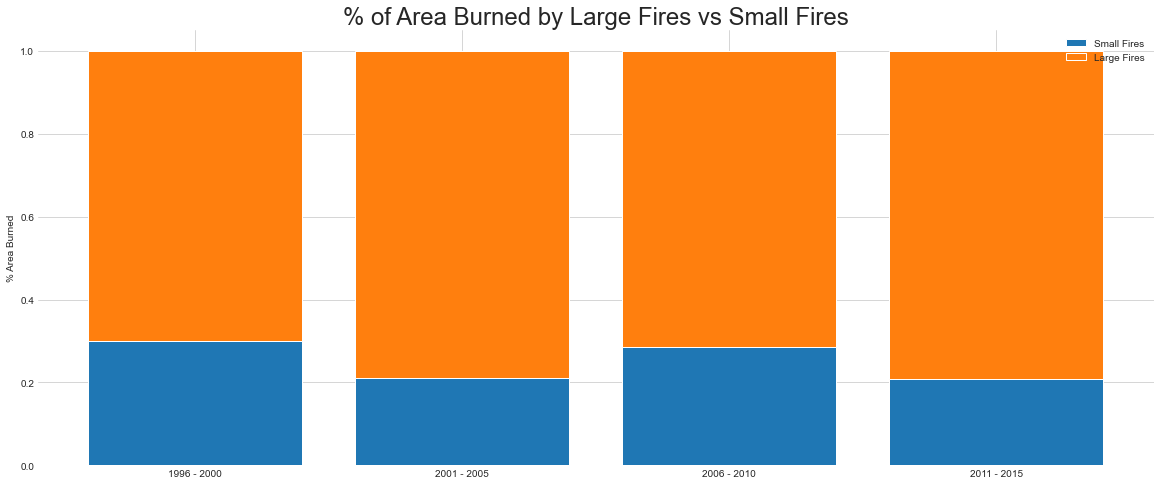

In [99]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year
ax.bar(labels, size.sm_normalized, label="Small Fires")
ax.bar(labels, size.lg_normalized, label="Large Fires", bottom = size.sm_normalized)

ax.legend()
ax.set_ylabel("% Area Burned")
ax.set_title("% of Area Burned by Large Fires vs Small Fires", fontdict={'fontsize': 24});

In [100]:
sizes.fire_size

quinquennial  fire_size_cat
1996 - 2000   large            1.762357e+07
              small            7.542910e+06
2001 - 2005   large            2.614225e+07
              small            6.988914e+06
2006 - 2010   large            2.456771e+07
              small            9.845666e+06
2011 - 2015   large            2.969284e+07
              small            7.838617e+06
Name: fire_size, dtype: float64

In [111]:
# separate large and small wildfires into their own dataframe
small = sizes[sizes.fire_size_cat == 'small']
large = sizes[sizes.fire_size_cat == 'large']

In [112]:
large.head()

,quinquennial,fire_size_cat,fire_size
0,1996 - 2000,large,1.762357e+07
2,2001 - 2005,large,2.614225e+07
4,2006 - 2010,large,2.456771e+07
6,2011 - 2015,large,2.969284e+07


In [113]:
small.quinquennial.unique()

array(['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015'],
      dtype=object)

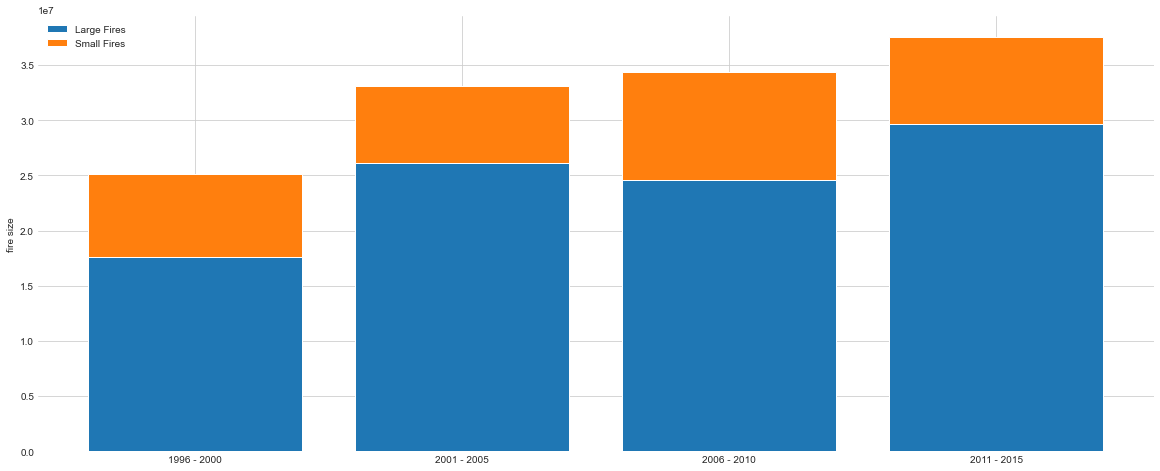

In [115]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year
ax.bar(labels, large.fire_size, label="Large Fires")
ax.bar(labels, small.fire_size, label="Small Fires", bottom=large.fire_size)

ax.legend()
ax.set_ylabel("fire size");

In [248]:
counts = df2.groupby(['quinquennial', 'fire_size_cat']).fire_size.count().to_frame().reset_index()
counts

,quinquennial,fire_size_cat,fire_size
0,1996 - 2000,large,746
1,1996 - 2000,small,390360
2,2001 - 2005,large,757
3,2001 - 2005,small,392942
4,2006 - 2010,large,908
5,2006 - 2010,small,471245
6,2011 - 2015,large,1048
7,2011 - 2015,small,386303


In [249]:
counts = counts.pivot(index='quinquennial', columns='fire_size_cat').reset_index()
counts

quinquennial fire_size        
fire_size_cat                  large   small
0              1996 - 2000       746  390360
1              2001 - 2005       757  392942
2              2006 - 2010       908  471245
3              2011 - 2015      1048  386303

In [251]:
counts.columns = ['quinquennial', 'large', 'small']
counts

,quinquennial,large,small
0,1996 - 2000,746,390360
1,2001 - 2005,757,392942
2,2006 - 2010,908,471245
3,2011 - 2015,1048,386303


In [252]:
counts['lg_normalized'] = counts.large / (counts.large + counts.small)
counts['sm_normalized'] = 1 - (counts.large / (counts.large + counts.small))
counts

,quinquennial,large,small,lg_normalized,sm_normalized
0,1996 - 2000,746,390360,0.001907,0.998093
1,2001 - 2005,757,392942,0.001923,0.998077
2,2006 - 2010,908,471245,0.001923,0.998077
3,2011 - 2015,1048,386303,0.002706,0.997294


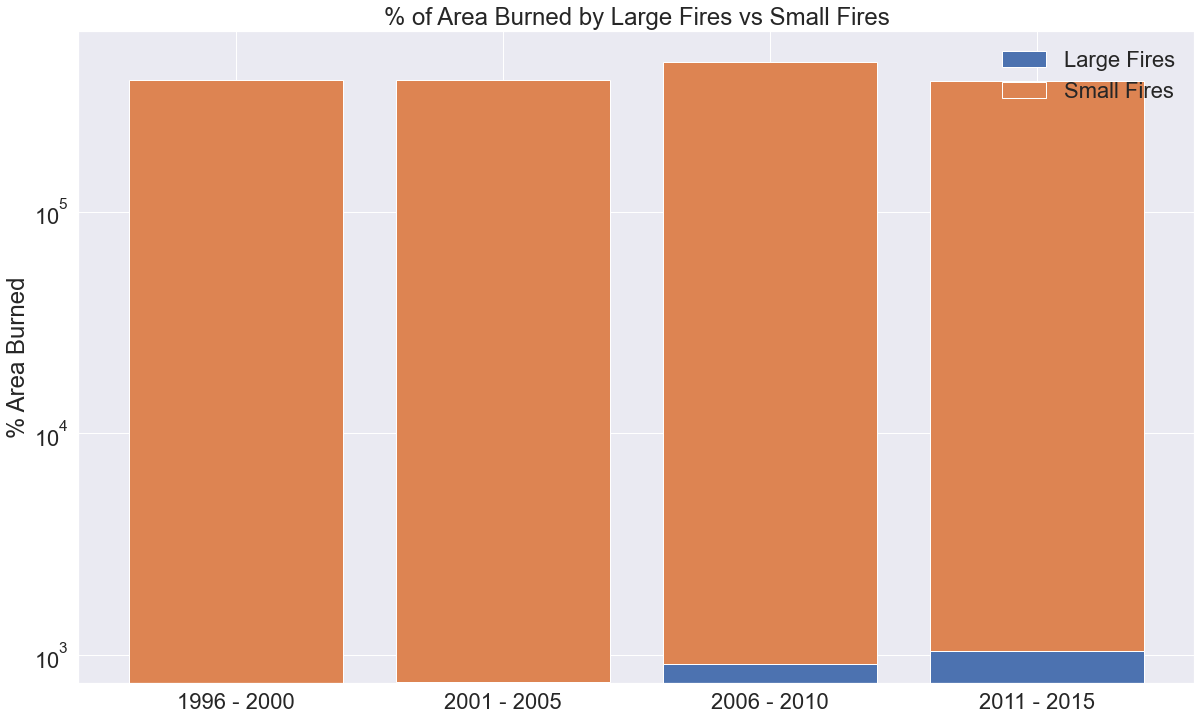

In [259]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,12))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year

ax.bar(labels, counts.large, label="Large Fires", log=True)
ax.bar(labels, counts.small, label="Small Fires", bottom = counts.large, log=True)

ax.legend()
ax.set_ylabel("% Area Burned")
ax.set_title("% of Area Burned by Large Fires vs Small Fires", fontdict={'fontsize': 24});

In [ ]:
yearly_mean_fire_size = df.groupby('year').fire_size.mean().reset_index()

In [ ]:
# # plot scatterplot with regression line
# # sns.color_palette("rocket", as_cmap=True)
# sns.lmplot(x='year', y='fire_size', data=yearly_mean_fire_size, height=8, markers='x', seed=321, robust=True)
# plt.title('Annual Average Acres Burned Is Increasing', size=14, color_palette='rocket')
# plt.xlabel('Year')
# plt.ylabel('Acres Burned');

In [ ]:
df.groupby('year').mean()

The smallest wildfire is only about 4.5 square feet

25% of fires are less than 1/10 of an acre

50% are less than one acre

75% are less than three acres

20% of fires are greater than 5 acres which is equivalent to three and a quarter football fields.

The largest wildfire is larger than 500,000 football fields or 85% of Rhode Island, our smallest state

---

#### I am going to create a column categorizing the fires as:

* small: up to the size of two tennis courts
* medium: up to the size of a football field
* large: up to the size of 4 football fields
* extra_lg: anything larger than this

In [ ]:
# create another column categorizing fire size
conditions = [df.fire_size <=.13, df.fire_size <=1.3, df.fire_size <=5.2, df.fire_size >5.2]
choices = ['small', 'medium', 'large', 'extra_lg']
df['size_category'] = np.select(conditions, choices)
df.head()

In [ ]:
df.size_category.value_counts(normalize=True)

In [ ]:
# plot size of fires by latitude and longitude
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df)

### With all the fires plotted across all the years, we see that the large majority seems to be smaller fires. Alaska does have a large amount of extra-large fires

In [ ]:
# checking to see what the fire size and location looks like for 2006
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df[df.year == 2006])

### It appears that the majority of the largest wildfires in 2006 happened in the central area of the US

In [ ]:
df.head()

In [ ]:
df.groupby('state').fire_size.sum().sort_values(ascending=False).head()

In [ ]:
y = df.groupby('state').fire_size.sum().sort_values(ascending=False).head(10).reset_index()
y.fire_size = round(y.fire_size/1_000_000)
y

In [ ]:
sns.barplot(x='state', y='fire_size', data=y)

In [ ]:
df[df.state == 'AK'].fire_size.sum()

### I am going to further explore extra-large fires to see if there's anything there.

In [ ]:
lg_df = df[df.size_category == 'extra_lg']
lg_df.info()

In [ ]:

lg_df.fire_size.describe()

In [ ]:
lg_df.general_cause.value_counts()

In [ ]:
x = df[df.fire_size > 9]
x.general_cause.value_counts()

In [ ]:

df[df.general_cause == 'Debris and open burning'].fire_size.describe()

In [ ]:

df[df.general_cause == 'Debris and open burning'].fire_size.hist()

In [ ]:

df[(df.general_cause == 'Debris and open burning') & (df.fire_size > 50_000)].info()

In [ ]:

df[df.general_cause == 'Natural'].fire_size.describe()

In [ ]:

df[df.general_cause == 'Natural'].fire_size.hist()

In [ ]:
df[(df.general_cause == 'Natural') & (df.fire_size > 50_000)].info()

In [ ]:

df[df.general_cause == 'Arson/incendiarism'].fire_size.describe()

In [ ]:
df[df.general_cause == 'Arson/incendiarism'].fire_size.hist()

In [ ]:

df[(df.general_cause == 'Arson/incendiarism') & (df.fire_size > 50_000)].info()

### Below is a list of states with the most and fewest amount of fires for each year in our dataset. Washington DC is most often the place with the fewest fires per year. Apart from DC, the states with the fewest fires per year include New England states such as Maryland, Vermont, Delaware, and Massachusetts; Puerto Rico had the fewest fires in 1996. California, Georgia, and Texas are the states with the greatest number of fires for every year except for 2018, during which Arizona had 9,738 fires.

In [ ]:
# # Sophia
# # print max and min for num fires/year
# for year in list(range(1992, 2019)):
#     print(year)
#     print('Fewest fires:', df[df.fire_year == year].groupby('state').fire_size.count().idxmin(), df[df.fire_year == year].groupby('state').fire_size.count().min())
#     print('Most fires:',df[df.fire_year == year].groupby('state').fire_size.count().idxmax(), df[df.fire_year == year].groupby('state').fire_size.count().max())
#     print() b

### A teammate discovered that the annual number of wildfires for TX  that we had in our database almost doubled for each year for the period 2005 and after vs 1992 - 2004. I am going to do a little exploring to see if I can discover why there's such a difference.

In [ ]:
# create separate dataframes for each period
texas_92 = df[(df.state == 'TX') & (df.fire_year < 2005)]
texas_05 = df[(df.state == 'TX') & (df.fire_year >= 2005)]
texas_05.head()

In [ ]:
# plot counts by year for period prior to 2005
sns.countplot(data=texas_92, x='year')

In [ ]:
# plot counts by year for period 2005 and after
sns.countplot(data=texas_05, x='year')

### If we look at the numbers on the y-axis, the year with the most fires, 1996, in period pre-2005 is less than the year with the least fires 2007, in period 2005 and after. This is a huge jump and slightly suspicious. Climate change is causing an increase in wildfires but not with that much of a difference from one year to the next.

In [ ]:
# check value counts for cause and normalize
texas_92.general_cause.value_counts(normalize=True)

In [ ]:
# check value counts for cause and normalize
texas_05.general_cause.value_counts(normalize=True)

Debris and open burning as a cause is down 6%

Missing data as a cause is up 100%

Equipment and vehicle use as a cause is up 7%

### There's nothing here that stands out as the reason for more fires. The significant increase in missing data makes me wonder if there may just have been a change in recording wildfires.

In [ ]:
# check stats for wildfire size to see if there's a difference
texas_92.fire_size.describe()

In [ ]:
# check stats for wildfire size to see if there's a difference
texas_05.fire_size.describe()

### The fact that there are many more smaller fires reaffirms my suspicions. It could be that prior to 2005 many of the smaller fires that were quicky contained were not documented and 2005 was when they started being more comprehensive in their documentation of fires. 

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2004)].general_cause.value_counts(normalize=True)

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2005)].general_cause.value_counts(normalize=True)

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2004)].fire_size.describe()

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2005)].fire_size.describe()

In [ ]:
df = pd.read_csv('fires.csv', index_col=0)
df.head()

In [ ]:
df[df.FIRE_SIZE_CLASS == 'G'].sort_values('FIRE_SIZE')

In [ ]:
df.FIRE_SIZE.sum()

In [ ]:
df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE.sum()

In [ ]:
df[df.FIRE_SIZE_CLASS != 'G'].FIRE_SIZE.sum()

In [ ]:
df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE.sum() / df.FIRE_SIZE.sum()

In [ ]:
df[df.FIRE_SIZE_CLASS == 'G'].NWCG_GENERAL_CAUSE.value_counts()

In [ ]:
# plot counts by year
sns.countplot(data=df[df.FIRE_SIZE_CLASS == 'G'], x='FIRE_YEAR')

In [ ]:
# plot counts by month
sns.countplot(data=df, x='month')